<a href="https://colab.research.google.com/github/Nishithmannuru/Nishith_INFO5731_Spring2022/blob/main/INFO5731_Assignment_Three_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Three**

In this assignment, you are required to conduct information extraction, semantic analysis based on **the dataset you collected from assignment two**. You may use scipy and numpy package in this assignment.

# **Question 1: Understand N-gram**

(45 points). Write a python program to conduct N-gram analysis based on the dataset in your assignment two:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the **noun phrases** and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets). 


In [1]:
# Write your code here

import pandas as pd
data = pd.read_csv("blacklivesmatter.csv")
data.head()

,Text
0,@Empire1721 #facts\nUkraine stands with white ...
1,Remember racism isn't a black people problem i...
2,"Born into slavery, Tubman escaped, then made 1..."
3,"“You can kill my body, and you can take my lif..."
4,"AMERICA NEEDS TO LABEL THE KKK, THE PROUD BOYS..."


In [2]:
import re

def cleantext(tweets):
    text = re.sub(r'@[A-Za-z0-9_]+', '', tweets) #removes @mentions
    text = re.sub(r'#[A-Za-z0-9_]+', '', text) #removing Hashtag symbols.
    text = re.sub(r'RT[\s]+', '', text) #removing Retweet symbol (RT).
    text = re.sub(r'https?:\/\/\S+', '', text) #remove URL's.
    text = re.sub(r"www.\S+", "", text)
    text = re.sub('[()!?]', ' ', text)
    text = re.sub('\[.*?\]',' ', text)
    text = re.sub("[^A-Za-z0-9]"," ", text)#Filtering non-alphanumeric characters
    text = re.sub('\\n', '', text)#removing the '\n' character
    text = re.sub(r'[0-9]+', '', text)#removing numbers
    
    return text

data["Text"] = data["Text"].apply(cleantext)

#Converting the text into lower case
data['Text']=data["Text"].apply(lambda x: " ".join(x.lower() for x in x.split()))

#removing stop words
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop=stopwords.words('english')
data['Text']=data['Text'].apply(lambda x:" ".join(x for x in x.split() if x not in stop))


#Lemmatization
from textblob import Word
nltk.download('wordnet')
data['Text']=data['Text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [3]:
data.head()

,Text
0,ukraine stand white supremacy russia stand
1,remember racism black people problem way white...
2,born slavery tubman escaped made mission rescu...
3,kill body take life never kill soul soul live ...
4,america need label kkk proud boy neo nazi hate...


In [ ]:
data.to_csv("clean_blacklivesmatter.csv", index = False)

In [4]:
import nltk
from nltk.util import ngrams

#Create all frequncies of unigrams, bigrams, trigrams for future use in the assignment
clean_data = open('clean_blacklivesmatter.csv', "r")
unigrams = ngrams(clean_data.read().split(), 1)
unigra_freq_dist=nltk.FreqDist(unigrams)
unigra_freq_dist

FreqDist({('Text',): 1,
          ('ukraine',): 14,
          ('stand',): 31,
          ('white',): 144,
          ('supremacy',): 7,
          ('russia',): 11,
          ('remember',): 11,
          ('racism',): 46,
          ('black',): 499,
          ('people',): 262,
          ('problem',): 13,
          ('way',): 22,
          ('view',): 3,
          ('born',): 7,
          ('slavery',): 8,
          ('tubman',): 4,
          ('escaped',): 1,
          ('made',): 30,
          ('mission',): 1,
          ('rescue',): 2,
          ('approx',): 1,
          ('slave',): 6,
          ('using',): 5,
          ('network',): 5,
          ('antislavery',): 1,
          ('activist',): 21,
          ('safe',): 8,
          ('house',): 4,
          ('known',): 7,
          ('underground',): 1,
          ('railroad',): 1,
          ('kill',): 15,
          ('body',): 4,
          ('take',): 27,
          ('life',): 140,
          ('never',): 70,
          ('soul',): 4,
          ('live',): 25,

In [5]:
#creating bigram for future use in the assignment
clean_data = open('clean_blacklivesmatter.csv', "r")
bigrams = ngrams(clean_data.read().split(), 2)
bigra_freq_dist=nltk.FreqDist(bigrams)
bigra_freq_dist

FreqDist({('Text', 'ukraine'): 1,
          ('ukraine', 'stand'): 1,
          ('stand', 'white'): 1,
          ('white', 'supremacy'): 7,
          ('supremacy', 'russia'): 1,
          ('russia', 'stand'): 1,
          ('stand', 'remember'): 1,
          ('remember', 'racism'): 1,
          ('racism', 'black'): 1,
          ('black', 'people'): 130,
          ('people', 'problem'): 2,
          ('problem', 'way'): 1,
          ('way', 'white'): 1,
          ('white', 'people'): 11,
          ('people', 'view'): 1,
          ('view', 'black'): 1,
          ('problem', 'born'): 1,
          ('born', 'slavery'): 1,
          ('slavery', 'tubman'): 1,
          ('tubman', 'escaped'): 1,
          ('escaped', 'made'): 1,
          ('made', 'mission'): 1,
          ('mission', 'rescue'): 1,
          ('rescue', 'approx'): 1,
          ('approx', 'slave'): 1,
          ('slave', 'using'): 1,
          ('using', 'network'): 1,
          ('network', 'antislavery'): 1,
          ('antislavery'

## (1) Count the frequency of all the N-grams (N=3).

In [6]:
#similarly for trigrams: using same methodology
#created trigram frequncies for the whole dataset
clean_data = open('clean_blacklivesmatter.csv', "r")
trigrams = ngrams(clean_data.read().split(), 3)
trigra_freq_dist=nltk.FreqDist(trigrams)
trigra_freq_dist

FreqDist({('Text', 'ukraine', 'stand'): 1,
          ('ukraine', 'stand', 'white'): 1,
          ('stand', 'white', 'supremacy'): 1,
          ('white', 'supremacy', 'russia'): 1,
          ('supremacy', 'russia', 'stand'): 1,
          ('russia', 'stand', 'remember'): 1,
          ('stand', 'remember', 'racism'): 1,
          ('remember', 'racism', 'black'): 1,
          ('racism', 'black', 'people'): 1,
          ('black', 'people', 'problem'): 2,
          ('people', 'problem', 'way'): 1,
          ('problem', 'way', 'white'): 1,
          ('way', 'white', 'people'): 1,
          ('white', 'people', 'view'): 1,
          ('people', 'view', 'black'): 1,
          ('view', 'black', 'people'): 1,
          ('people', 'problem', 'born'): 1,
          ('problem', 'born', 'slavery'): 1,
          ('born', 'slavery', 'tubman'): 1,
          ('slavery', 'tubman', 'escaped'): 1,
          ('tubman', 'escaped', 'made'): 1,
          ('escaped', 'made', 'mission'): 1,
          ('made', 'missi

## (2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

In [7]:
#This is a fucntion which will give probability of  all the bigrams in the dataset using the given formula
def probability_bigram():
    for bigram_values in bigra_freq_dist:
        #print(bigram_values)
        print(("bigram values", bigram_values,"Probability :",bigra_freq_dist[bigram_values]/unigra_freq_dist[(bigram_values[0],)]))

probability_bigram()

Streaming output truncated to the last 5000 lines.
('bigram values', ('quo', 'created'), 'Probability :', 1.0)
('bigram values', ('created', 'powerful'), 'Probability :', 0.25)
('bigram values', ('powerful', 'image'), 'Probability :', 0.1)
('bigram values', ('image', 'use'), 'Probability :', 0.14285714285714285)
('bigram values', ('use', 'please'), 'Probability :', 0.045454545454545456)
('bigram values', ('please', 'follow'), 'Probability :', 0.025)
('bigram values', ('follow', 'u'), 'Probability :', 0.058823529411764705)
('bigram values', ('u', 'silence'), 'Probability :', 0.01098901098901099)
('bigram values', ('silence', 'voice'), 'Probability :', 0.3333333333333333)
('bigram values', ('voice', 'voice'), 'Probability :', 0.06666666666666667)
('bigram values', ('voice', 'matter'), 'Probability :', 0.06666666666666667)
('bigram values', ('matter', 'taken'), 'Probability :', 0.011111111111111112)
('bigram values', ('taken', 'young'), 'Probability :', 0.14285714285714285)
('bigram value

## (3) Extract all the **noun phrases** and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets). 

In [11]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from textblob import TextBlob
clean_data = open('clean_blacklivesmatter.csv', "r")

_noun = lambda pos: pos[:2] == 'NN'
tokenized = nltk.word_tokenize(clean_data.read())
nouns = [word for (word, pos) in nltk.pos_tag(tokenized) if _noun(pos)] 
#displays all the nouns in the clean data
#print(nouns)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [12]:
nouns

['Text',
 'supremacy',
 'russia',
 'racism',
 'people',
 'problem',
 'way',
 'people',
 'people',
 'problem',
 'slavery',
 'tubman',
 'mission',
 'rescue',
 'approx',
 'network',
 'activist',
 'house',
 'railroad',
 'body',
 'life',
 'soul',
 'newton',
 'america',
 'boy',
 'neo',
 'hate',
 'group',
 'date',
 'arbery',
 'shot',
 'neighborhood',
 'ga',
 'today',
 'georgia',
 'recognize',
 'year',
 'ahmaud',
 'day',
 'month',
 'movement',
 'history',
 'year',
 'jaw',
 'trans',
 'break',
 'prejudice',
 'origin',
 'development',
 'society',
 'canada',
 'livingstone',
 'today',
 'arbery',
 'year',
 'day',
 'power',
 'culture',
 'musketeer',
 'community',
 'courtesy',
 'emergency',
 'act',
 'time',
 'solidarity',
 'night',
 'join',
 'leader',
 'activist',
 'discus',
 'trayvon',
 'racism',
 'watch',
 'replay',
 'stewardship',
 'accounting',
 'cycle',
 'calendar',
 'year',
 'july',
 'cycle',
 'image',
 'george',
 'floyd',
 'juror',
 'begin',
 'deliberation',
 'trial',
 'ex',
 'officer',
 'georg

In [13]:
#or other way
import nltk
nltk.download('brown')
clean_data = open('clean_blacklivesmatter.csv', "r")
#print(clean_data)
blob = TextBlob(clean_data.read())
noun_phrases = blob.noun_phrases
print(noun_phrases) #to print all the noun phrases from the clean dataset

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
['text', 'ukraine stand', 'white supremacy russia stand', 'black people problem way', 'white people', 'black people problem', 'slavery tubman', 'mission rescue approx slave', 'network antislavery activist', 'safe house', 'underground railroad', 'soul soul', 'huey p newton america need label kkk', 'proud boy neo nazi', 'group date', 'ahmaud arbery shot', 'brunswick ga', 'sate georgia', 'feb year ahmaud arbery day month movement hope', 'black history', 'everyday year', 'jaw trans girl', 'individual origin', 'inclusive society canada kay livingstone', 'ahmaud arbery', 'rest power', 'black culture', 'musketeer community', 'courtesy emergency act', 'time solidarity', 'black leader activist discus trayvon martin racism', 'legal stewardship', 'cycle calendar year', 'june cycle', 'amazing image', 'george floyd career criminal', 'federal trial ex officer', 'george floyd', 'los angeles californ

In [14]:
noun_phrases

WordList(['text', 'ukraine stand', 'white supremacy russia stand', 'black people problem way', 'white people', 'black people problem', 'slavery tubman', 'mission rescue approx slave', 'network antislavery activist', 'safe house', 'underground railroad', 'soul soul', 'huey p newton america need label kkk', 'proud boy neo nazi', 'group date', 'ahmaud arbery shot', 'brunswick ga', 'sate georgia', 'feb year ahmaud arbery day month movement hope', 'black history', 'everyday year', 'jaw trans girl', 'individual origin', 'inclusive society canada kay livingstone', 'ahmaud arbery', 'rest power', 'black culture', 'musketeer community', 'courtesy emergency act', 'time solidarity', 'black leader activist discus trayvon martin racism', 'legal stewardship', 'cycle calendar year', 'june cycle', 'amazing image', 'george floyd career criminal', 'federal trial ex officer', 'george floyd', 'los angeles california los angeles law enforcement', 'rubber bullet', 'clear justice department', 'resource dispos

In [15]:
df_noun = pd.DataFrame(noun_phrases, columns = ['noun_phrases'])
df_noun # adding the noun phrases to the data frame

,noun_phrases
0,text
1,ukraine stand
2,white supremacy russia stand
3,black people problem way
4,white people
...,...
4206,apology kindness heal earth judicial discretion
4207,police immunity
4208,standard mic drop scientist shuts
4209,black life matter


In [16]:
import nltk

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

clean_data = open('clean_blacklivesmatter.csv', "r")
f = nltk.FreqDist(noun_phrases)
f # gives the frequncy of noun phrases

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


FreqDist({'text': 1,
          'ukraine stand': 1,
          'white supremacy russia stand': 1,
          'black people problem way': 1,
          'white people': 8,
          'black people problem': 1,
          'slavery tubman': 1,
          'mission rescue approx slave': 1,
          'network antislavery activist': 1,
          'safe house': 1,
          'underground railroad': 1,
          'soul soul': 1,
          'huey p newton america need label kkk': 1,
          'proud boy neo nazi': 1,
          'group date': 1,
          'ahmaud arbery shot': 1,
          'brunswick ga': 1,
          'sate georgia': 1,
          'feb year ahmaud arbery day month movement hope': 1,
          'black history': 12,
          'everyday year': 1,
          'jaw trans girl': 1,
          'individual origin': 1,
          'inclusive society canada kay livingstone': 1,
          'ahmaud arbery': 26,
          'rest power': 2,
          'black culture': 2,
          'musketeer community': 1,
         

# **Question 2: Undersand TF-IDF and Document representation**

(20 points). Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program: 

(1) To build the **documents-terms weights (tf*idf) matrix bold text**.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using **cosine similarity**.

## (1) To build the **documents-terms weights (tf*idf) matrix bold text**.

In [17]:
# Write your code here


#calculating tf
tf_result = (data['Text']).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
tf_result.columns = ['tweet_words','tf']
tf_result

,tweet_words,tf
0,stand,31.0
1,ukraine,14.0
2,white,144.0
3,supremacy,7.0
4,russia,11.0
...,...,...
5027,defensible,1.0
5028,rationally,1.0
5029,imposed,1.0
5030,scientist,1.0


In [18]:
import numpy as np
#calculating tf*idf
for i,j in enumerate(tf_result['tweet_words']):
    tf_result.loc[i, 'idf'] = np.log(data.shape[0]/(len(data[data['Text'].str.contains(j)])))
tf_result['tf*idf'] = tf_result['tf'] * tf_result['idf']
tf_result

,tweet_words,tf,idf,tf*idf
0,stand,31.0,3.808839,118.074002
1,ukraine,14.0,5.175715,72.460011
2,white,144.0,2.842825,409.366743
3,supremacy,7.0,5.794754,40.563280
4,russia,11.0,4.796225,52.758480
...,...,...,...,...
5027,defensible,1.0,7.740664,7.740664
5028,rationally,1.0,7.740664,7.740664
5029,imposed,1.0,7.740664,7.740664
5030,scientist,1.0,7.740664,7.740664


## (2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using **cosine similarity**.

In [19]:
#importing required libraries
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.corpus import stopwords
import numpy as np
import numpy.linalg as LA

In [20]:
tn_set = data['Text'].values.tolist() #train set
tt_set = "black life matter everyone going get result sort look like result design sad"   #Query taken from one of the tweets which is called test set
tt_set = [tt_set]
stopWords = stopwords.words('english')
vzer = CountVectorizer(stop_words = stopWords)
#print(vectorizer)
transformer = TfidfTransformer()
#print(transformer)

In [21]:
tnVectorizerArray = vzer.fit_transform(tn_set).toarray()
ttVectorizerArray = vzer.transform(tt_set).toarray()
cx = lambda a, b : np.inner(a, b)/(LA.norm(a)*LA.norm(b))
cosine_values = []

In [22]:
for vector in tnVectorizerArray:
        for testV in ttVectorizerArray:
            cosine = cx(vector, testV)
            cosine_values.append(cosine)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


In [23]:
df_result = data.filter(['Text'], axis=1)
se = pd.Series(cosine_values)
df_result['Cosine_similarity'] = se.values
df_result

,Text,Cosine_similarity
0,ukraine stand white supremacy russia stand,0.000000
1,remember racism black people problem way white...,0.110096
2,born slavery tubman escaped made mission rescu...,0.000000
3,kill body take life never kill soul soul live ...,0.064550
4,america need label kkk proud boy neo nazi hate...,0.000000
...,...,...
2295,repair damage country inflicted upon black peo...,0.074536
2296,fight attack critical race theory look black h...,0.172133
2297,get apology kindness heal earth,0.115470
2298,judicial discretion strictly limited amp reexa...,0.000000


# **Question 3: Create your own word embedding model**

(20 points). Use the data you collected for assignment two to build a word embedding model: 

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

In [24]:
import pandas as pd
import gensim
from gensim import models
from gensim.models import Word2Vec

df = pd.read_csv("clean_blacklivesmatter.csv")

## (1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

In [25]:
list2 = []
for i in df.index:
    y = str(df["Text"][i]).split()
    list2.append(y)

In [26]:
model2 = Word2Vec(list2, size = 300)
print(model2)

Word2Vec(vocab=852, size=300, alpha=0.025)


In [27]:
words2 = list(model2.wv.vocab)


In [32]:
words2

['ukraine',
 'stand',
 'white',
 'supremacy',
 'russia',
 'remember',
 'racism',
 'black',
 'people',
 'problem',
 'way',
 'born',
 'slavery',
 'made',
 'slave',
 'using',
 'network',
 'activist',
 'safe',
 'known',
 'kill',
 'take',
 'life',
 'never',
 'live',
 'p',
 'america',
 'need',
 'proud',
 'boy',
 'nazi',
 'hate',
 'group',
 'ahmaud',
 'arbery',
 'shot',
 'jogging',
 'neighborhood',
 'ga',
 'today',
 'georgia',
 'feb',
 'year',
 'day',
 'month',
 'movement',
 'hope',
 'learning',
 'history',
 'ding',
 'amp',
 'forget',
 'trans',
 'girl',
 'protest',
 'hard',
 'break',
 'equality',
 'individual',
 'society',
 'canada',
 'murdered',
 'ago',
 'may',
 'rest',
 'power',
 'culture',
 'community',
 'act',
 'via',
 'time',
 'solidarity',
 'last',
 'night',
 'join',
 'florida',
 'leader',
 'discus',
 'trayvon',
 'martin',
 'watch',
 'legal',
 'changed',
 'cycle',
 'june',
 'amazing',
 'image',
 'know',
 'george',
 'floyd',
 'criminal',
 'one',
 'going',
 'say',
 'begin',
 'federal',
 '

In [28]:
print(model2['racism'])

[-0.04355594  0.15819836  0.03826973  0.06763107  0.03603048 -0.0629051
 -0.07067259  0.09096753  0.07343712 -0.10264724 -0.05344589  0.2718327
 -0.00193576 -0.21652038 -0.06329038 -0.02051006  0.00140799 -0.02274071
 -0.0055335  -0.1624895  -0.01387584  0.15425605 -0.08952168  0.03525617
 -0.00473539  0.09164182 -0.11143647 -0.05444985  0.03839373  0.08768905
 -0.02978365  0.07149679  0.15326771  0.02707896 -0.02565147  0.05434302
 -0.00422028  0.16166818 -0.00493844  0.06289793 -0.21857259  0.00356751
 -0.06072312 -0.08860758  0.15970899  0.03655771 -0.06053201  0.13592643
 -0.20828748 -0.07189374 -0.02416457  0.07113004 -0.00094322 -0.00175229
 -0.05837817  0.21432362  0.02225269 -0.17663144  0.08320576 -0.11302309
 -0.10355929 -0.35584694  0.01499732 -0.12209328  0.08027202 -0.07844046
  0.17299698  0.02990438  0.11533498 -0.10438949  0.13592696  0.02493929
  0.09851303  0.11141618  0.04141762 -0.0061726   0.04959287  0.09231829
 -0.05794568  0.07422134  0.0769696   0.04980709 -0.0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


## (2) Visualize the word embedding model you created.

In [29]:
# fit a 2d PCA model to the vectors
from sklearn.decomposition import PCA

X = model2[model2.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.


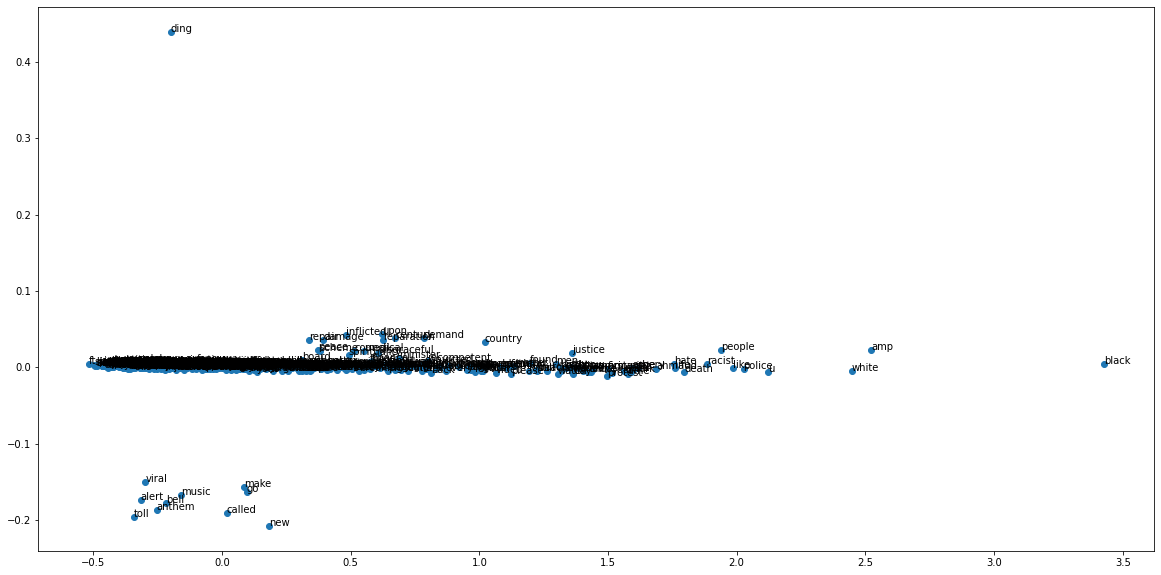

In [30]:
# create a scatter plot of the projection
import matplotlib.pyplot as plt
plt.figure (figsize = (20,10))
plt.scatter(result[:, 0], result[:, 1])
words = list(model2.wv.vocab)
for i, word in enumerate(words):
	plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()

# **Question 4: Create your own training and evaluation data for sentiment analysis**

(15 points). **You dodn't need to write program for this question!** Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral). Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew. This datset will be used for assignment four: sentiment analysis and text classification. 


In [31]:
# The GitHub link of your final csv file

print ("The final CSV file can be obtained from : https://github.com/Nishithmannuru/Nishith_INFO5731_Spring2022/blob/main/Assignment4.csv")

The final CSV file can be obtained from : https://github.com/Nishithmannuru/Nishith_INFO5731_Spring2022/blob/main/Assignment4.csv
